## Question 1

Let's assume that this given algorithm generates an event that can be portrayed by the random variable X. $\\$

$\hspace{5cm}$ $\mathbb{P}$($X=1$) = $\mathbb{P}$($C_2=1$)$\mathbb{P}$($C_1=1$) $\\$

$\hspace{5cm}$ $\Rightarrow$ $\hspace{1cm}$  $\mathbb{P}$($X=1$) = $\frac{p_y c_y}{c_y + c_x}$  $\\$

This shows that the given algoritm works as a : $\mathbb{Bern}$ ~ $\left(\frac{p_y c_y}{c_y + c_x}\right)$  $\\$
We can also verify this by checking : $\mathbb{P}$($X=0$) = 1 - $\frac{p_y c_y}{c_y + c_x}$ $\\$

From these arguments we can concur that the probability distribution of getting an ouput will be : $\mathbb{Bern}$ ~ $\left(\frac{p_y c_y + p_x c_x}{c_y + c_x}\right)$ $\\$

Now, for the distribution of number of iterations to get an output the distribution will follow  : $\mathbb{Binomial}$ $\left(n,p\right)$ where p = $\frac{p_y c_y + p_x c_x}{c_y + c_x}$ . This comes out to be as we know that n Bern(p) distributions contribute to a Binomial one. Here we don't know the variable n.


## Question 2

I have used 2 functions gamma(k) and sample_sphere to accomplish the answer. The below 3 cells show the code and visualizations required . Also I have run it for p=3 and you can also see the graph for it by running the below cells.


In [1]:
function gamma(k)
    prod=1
    if k==1
        return 1
    elseif k==0.5
        return pi^0.5
    else
        return (k-1)*gamma(k-1)
    end
end
function sample_sphere(p)
    c = ((2^p)/pi^(p/2))*gamma((p/2)+1)
    while true
        arr = []
        for i in 1:p
            x = -1+2*rand()
            push!(arr,x)
        end
        sum=0
        for i in 1:length(arr)
            sum += arr[i]^2
        end
        if sum<1 && sum<1
            return arr
            break
        else
            continue
        end
    end
end    

sample_sphere (generic function with 1 method)

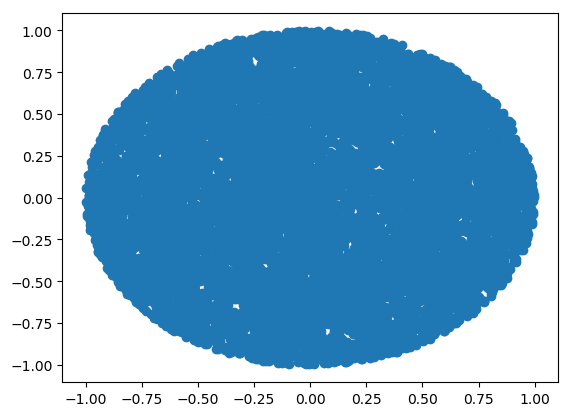

In [11]:
tot=10000
distribution_x = []
distribution_y = []
for i in 1:tot
    val = sample_sphere(2)
    push!(distribution_x,val[1])
    push!(distribution_y,val[2])  
end

#plot(distribution,x=:Values, kind="histogram")
using PyPlot
PyPlot.scatter(distribution_x,distribution_y);

In [67]:
tot=10000
distribution_x = []
distribution_y = []
distribution_z = []
for i in 1:tot
    val = sample_sphere(3)
    push!(distribution_x,val[1])
    push!(distribution_y,val[2])  
    push!(distribution_z,val[3])  
end
#print(distribution_x)
#plot(distribution,x=:Values, kind="histogram")
using Plots

p = scatter3d(distribution_x,distribution_y,distribution_z)
# plot(surface)
gui(scatter3d(distribution_x,distribution_y,distribution_z))
# png([p,],filename)
#PyPlot.scatter(distribution_x,distribution_y);

## Question 3

So to solve this question I have first made program to sample from cauchy and then use that as proposal in accept reject for standard normal sampler. Using that sampler I use accept reject to sample from the truncated standard normal distribution given in the question.

In [120]:
function pdf_stnd_normal(x)
    return exp(-1*(x^2)/2)/(2*pi)^0.5
end
function cauchy(x)
    return 1/(pi*(1+x^2))
end

cauchy (generic function with 1 method)

In [162]:
function sample_cauchy()
    x = rand()
    return tan(pi*(x-0.5))
end
function sample_stnd_normal()
    c = ((2*pi)^0.5)*exp(-0.5) + 0.1
    while true
        x = sample_cauchy()
        y = rand()
       ratio = pdf_stnd_normal(x)/c*cauchy(x)
        if y<ratio
            return x
            break
        else
            continue
        end
    end
end    

sample_stnd_normal (generic function with 1 method)

Expectation = -0.0003692455937195364
Variance = 0.3107689463551625

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[179]:18
└ @ Core In[179]:18


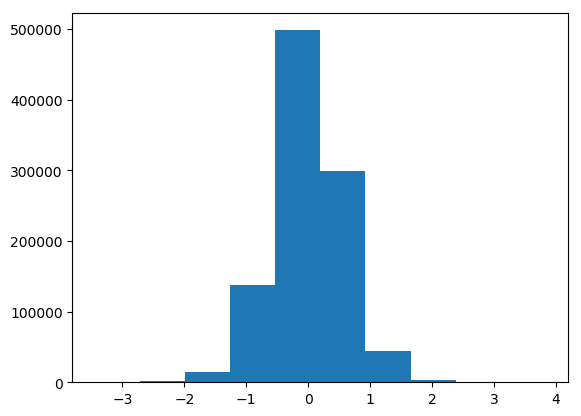

In [179]:
distribution = []

sum = 0
var = 0
tot = 1000000
for i in 1:tot
  val = sample_stnd_normal()
  push!(distribution,val)  
  sum+=val
  var += val*val
  #print(" ",val)
end
variance = var/tot - (sum/tot)^2
print("Expectation = ",sum/tot)
print("\nVariance = ",variance)
#plot(distribution,x=:Values, kind="histogram")
using PyPlot
PyPlot.plt[:hist](distribution,bins=10);

In [180]:
function sample_q3(a)
    while true
        x = sample_stnd_normal()
        if x<a && x>-1*a
            return x
            break
        else
            continue
        end
    end
end    

sample_q3 (generic function with 1 method)

Expectation = 0.0003964515753763832
Variance = 0.31119664119266194

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[187]:18
└ @ Core In[187]:18


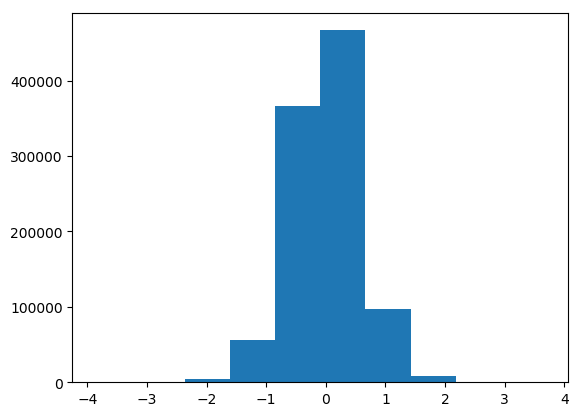

In [187]:
distribution = []

sum = 0
var = 0
tot = 1000000
for i in 1:tot
  val = sample_q3(4)
  push!(distribution,val)  
  sum+=val
  var += val*val
  #print(" ",val)
end
variance = var/tot - (sum/tot)^2
print("Expectation = ",sum/tot)
print("\nVariance = ",variance)
#plot(distribution,x=:Values, kind="histogram")
using PyPlot
PyPlot.plt[:hist](distribution,bins=10);

Expectation = 0.00014242638782437978
Variance = 0.19339715905083885

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[192]:18
└ @ Core In[192]:18


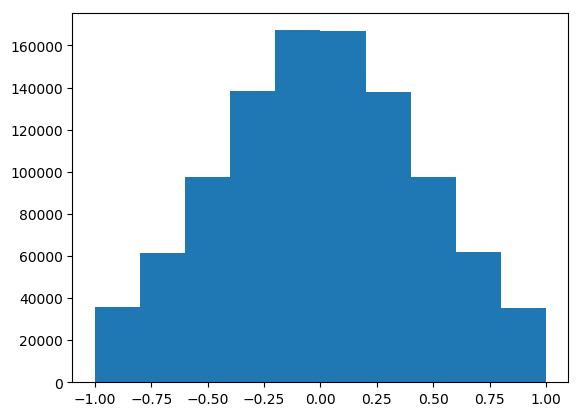

In [192]:
distribution = []

sum = 0
var = 0
tot = 1000000
for i in 1:tot
  val = sample_q3(1)
  push!(distribution,val)  
  sum+=val
  var += val*val
  #print(" ",val)
end
variance = var/tot - (sum/tot)^2
print("Expectation = ",sum/tot)
print("\nVariance = ",variance)
#plot(distribution,x=:Values, kind="histogram")
using PyPlot
PyPlot.plt[:hist](distribution,bins=10);

As we decrease a towards 0 the variance goes to zero. Same is the difference between the two settings that is for $a=1$ and $a=4$